In [1]:
from gp_2D import *

In [2]:
input_file = '../training_results/2D/train_inputs.json'
var_file = '../training_results/2D/train_outputs_log_var.json'
output_file = '../training_results/2D/train_outputs_log_mean.json'
output_type = 'P'


In [3]:
gp = LPI_GP_2D(input_file=input_file, output_file=output_file, output_type=output_type, var_file=var_file)

In [4]:
gp.optimise_noise_GP()

l1 =  0.1327465766240115 l2 =  0.5152602771881635 var =  0.1327465766240115


In [5]:
gp.optimise_GP()

l1 =  0.5994842503189409 l2 =  35.93813663804626 var =  0.07937005259840996


In [6]:
N = 1000
Ln_300 = np.ones(N)*300e-6
Ln_500 = np.ones(N)*500e-6
Ln_1000 = np.ones(N)*1000e-6
I = np.geomspace(1e14, 1e16, N)
X_300 = []
X_500 = []
X_1000 = []
for i in range(N):
        X_300.append([I[i], Ln_300[i]])
        X_500.append([I[i], Ln_500[i]])
        X_1000.append([I[i], Ln_1000[i]])

X_300 = np.array(X_300)
X_500 = np.array(X_500)
X_1000 = np.array(X_1000)

In [7]:
Y_300, err_300 = gp.GP_predict(X_300, get_std=True)
Y_500, err_500 = gp.GP_predict(X_500, get_std=True)
Y_1000, err_1000 = gp.GP_predict(X_1000, get_std=True)

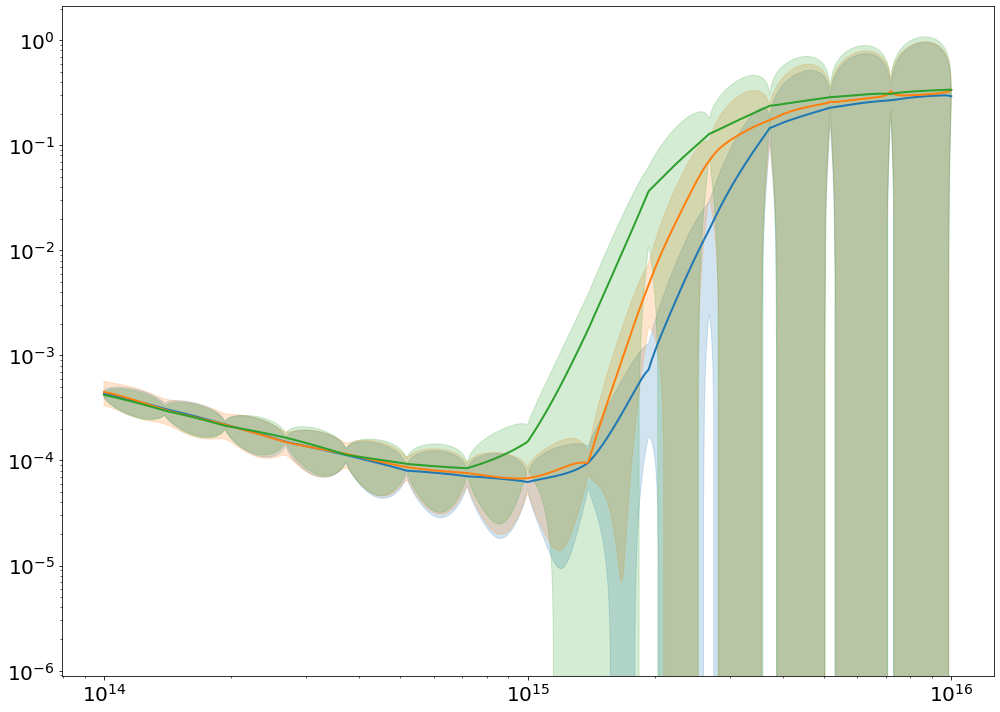

In [8]:
plt.loglog(X_300[:,0].flatten(), Y_300.flatten(), color = 'C0')
plt.plot(X_500[:,0].flatten(), Y_500.flatten(), color = 'C1')
plt.plot(X_1000[:,0].flatten(), Y_1000.flatten(), color = 'C2')

plt.fill_between(X_300[:,0].flatten(), Y_300-err_300, Y_300+err_300, alpha = 0.2, color = 'C0')
plt.fill_between(X_500[:,0].flatten(), Y_500.flatten()-err_500, Y_500.flatten()+err_500, alpha = 0.2, color = 'C1')
plt.fill_between(X_1000[:,0].flatten(), Y_1000.flatten()-err_1000, Y_1000.flatten()+err_1000, alpha = 0.2, color = 'C2')

In [9]:
I = np.geomspace(1e14, 1e16, 100)
Ln = np.geomspace(300e-6, 1000e-6, 100)

X_plot = []
for i in range(100):
    for j in range(100):
        X_plot.append([I[i], Ln[j]])

X_plot = np.array(X_plot)

In [10]:
Y_plot, err_plot = gp.GP_predict(X_plot, get_std=True)

In [11]:
I_plot, Ln_plot = np.meshgrid(I, Ln)

In [12]:
Z = (Y_plot*X_plot[:,0]).reshape(100, 100).T

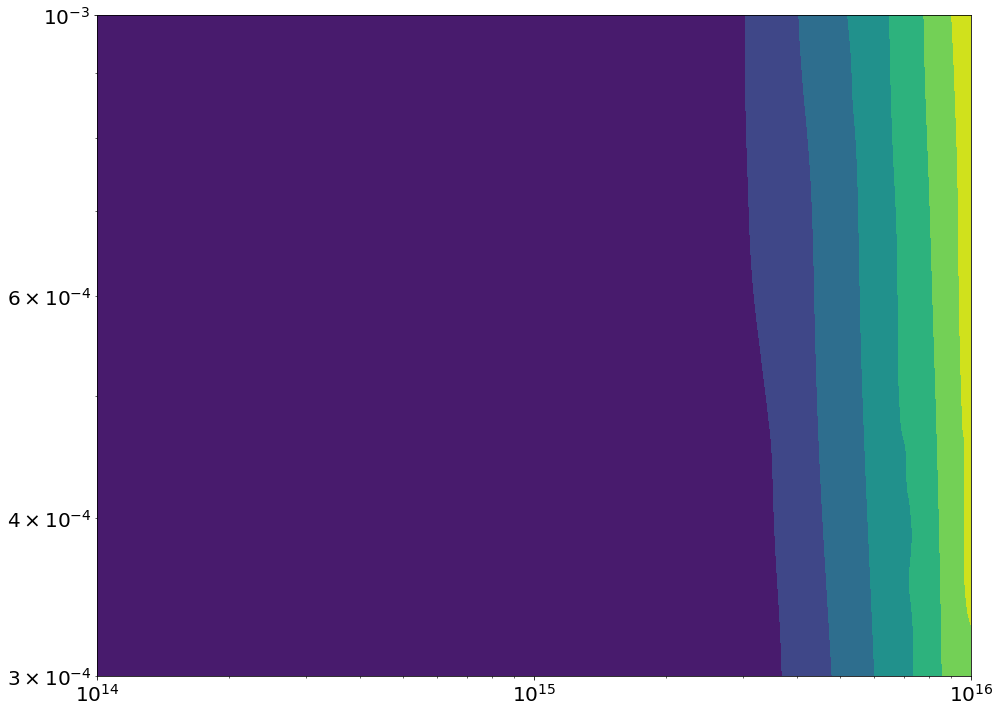

In [13]:
from matplotlib.colors import LogNorm
plt.contourf(I_plot, Ln_plot, Z)
plt.yscale('log')
plt.xscale('log')